In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import seaborn as sns
# from MCForecastTools import MCSimulation
# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()


%matplotlib inline

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [3]:
# Tickers
ticker = ["TSLA", "GDX"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# # Get 5 year's worth of historical data for Tesla, GDX, BLCN, SPX
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
df_ticker.head(10)

GDX                                       TSLA  \
                            open     high     low  close    volume     open   
time                                                                          
2017-06-05 00:00:00-04:00  22.83  22.8900  22.490  22.75  20900535  338.500   
2017-06-06 00:00:00-04:00  23.08  23.8600  23.080  23.81  70629310  344.950   
2017-06-07 00:00:00-04:00  23.57  23.8200  23.320  23.63  46367450  356.300   
2017-06-08 00:00:00-04:00  23.40  23.4100  22.960  23.22  49007888  363.750   
2017-06-09 00:00:00-04:00  22.84  23.1115  22.810  22.84  34238600  374.420   
2017-06-12 00:00:00-04:00  22.75  22.9711  22.680  22.75  34267374  357.990   
2017-06-13 00:00:00-04:00  22.61  23.1400  22.600  22.97  32647842  367.670   
2017-06-14 00:00:00-04:00  23.38  23.4200  22.095  22.25  71051409  381.085   
2017-06-15 00:00:00-04:00  22.00  22.3400  21.960  22.11  47857414  372.500   
2017-06-16 00:00:00-04:00  22.06  22.1700  21.940  22.05  42827345  377.780   

                                                                 
                               high     low     close    volume  
time                                                             
2017-06-05 00:00:00-04:00  348.4400  334.21  347.3200   5684288  
2017-06-06 00:00:00-04:00  359.4929  344.66  352.8000   9465968  
2017-06-07 00:00:00-04:00  360.5000  355.14  359.5500   7850542  
2017-06-08 00:00:00-04:00  371.9000  360.22  370.0100   7489685  
2017-06-09 00:00:00-04:00  376.8700  354.80  357.4500  14323526  
2017-06-12 00:00:00-04:00  364.5000  350.62  358.9900   8528936  
2017-06-13 00:00:00-04:00  376.0000  366.61  375.9500   9720070  
2017-06-14 00:00:00-04:00  384.2500  376.31  380.6599  10303555  
2017-06-15 00:00:00-04:00  375.4600  366.49  375.3400   8585072  
2017-06-16 00:00:00-04:00  378.0100  370.10  371.4000   4691654

In [4]:
# Tickers
ticker = ["SPY", "TSLA", "GDX", "BLCN"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# # Get 5 year's worth of historical data for Tesla, GDX, BLCN, SPX
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
df_ticker.head(10)

BLCN                          GDX                   \
                          open high low close volume   open     high     low   
time                                                                           
2017-06-05 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.83  22.8900  22.490   
2017-06-06 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  23.08  23.8600  23.080   
2017-06-07 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  23.57  23.8200  23.320   
2017-06-08 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  23.40  23.4100  22.960   
2017-06-09 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.84  23.1115  22.810   
2017-06-12 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.75  22.9711  22.680   
2017-06-13 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.61  23.1400  22.600   
2017-06-14 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  23.38  23.4200  22.095   
2017-06-15 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.00  22.3400  21.960   
2017-06-16 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.06  22.1700  21.940   

                                               SPY                             \
                           close    volume    open    high       low    close   
time                                                                            
2017-06-05 00:00:00-04:00  22.75  20900535  243.98  244.30  243.7600  243.965   
2017-06-06 00:00:00-04:00  23.81  70629310  243.31  243.98  243.1200  243.250   
2017-06-07 00:00:00-04:00  23.63  46367450  243.60  243.92  242.8300  243.650   
2017-06-08 00:00:00-04:00  23.22  49007888  243.77  244.33  243.1700  243.760   
2017-06-09 00:00:00-04:00  22.84  34238600  244.09  245.01  241.9500  243.450   
2017-06-12 00:00:00-04:00  22.75  34267374  243.14  243.42  242.3800  243.340   
2017-06-13 00:00:00-04:00  22.97  32647842  243.99  244.61  243.5799  244.520   
2017-06-14 00:00:00-04:00  22.25  71051409  244.86  244.87  243.2900  244.260   
2017-06-15 00:00:00-04:00  22.11  47857414  242.68  243.91  242.3600  243.790   
2017-06-16 00:00:00-04:00  22.05  42827345  242.77  242.83  241.6337  242.630   

                                         TSLA                              \
                              volume     open      high     low     close   
time                                                                        
2017-06-05 00:00:00-04:00   27596403  338.500  348.4400  334.21  347.3200   
2017-06-06 00:00:00-04:00   36562468  344.950  359.4929  344.66  352.8000   
2017-06-07 00:00:00-04:00   38602639  356.300  360.5000  355.14  359.5500   
2017-06-08 00:00:00-04:00   48051333  363.750  371.9000  360.22  370.0100   
2017-06-09 00:00:00-04:00  103578275  374.420  376.8700  354.80  357.4500   
2017-06-12 00:00:00-04:00   57096569  357.990  364.5000  350.62  358.9900   
2017-06-13 00:00:00-04:00   43470532  367.670  376.0000  366.61  375.9500   
2017-06-14 00:00:00-04:00   55098826  381.085  384.2500  376.31  380.6599   
2017-06-15 00:00:00-04:00   51523068  372.500  375.4600  366.49  375.3400   
2017-06-16 00:00:00-04:00   48998243  377.780  378.0100  370.10  371.4000   

                                     
                             volume  
time                                 
2017-06-05 00:00:00-04:00   5684288  
2017-06-06 00:00:00-04:00   9465968  
2017-06-07 00:00:00-04:00   7850542  
2017-06-08 00:00:00-04:00   7489685  
2017-06-09 00:00:00-04:00  14323526  
2017-06-12 00:00:00-04:00   8528936  
2017-06-13 00:00:00-04:00   9720070  
2017-06-14 00:00:00-04:00  10303555  
2017-06-15 00:00:00-04:00   8585072  
2017-06-16 00:00:00-04:00   4691654

In [5]:
df_ticker.isnull().sum()

BLCN  open      159
      high      159
      low       159
      close     159
      volume    159
GDX   open        0
      high        0
      low         0
      close       0
      volume      0
SPY   open        0
      high        0
      low         0
      close       0
      volume      0
TSLA  open        0
      high        0
      low         0
      close       0
      volume      0
dtype: int64

In [6]:
df = df_ticker.dropna()

df.isnull().sum()

BLCN  open      0
      high      0
      low       0
      close     0
      volume    0
GDX   open      0
      high      0
      low       0
      close     0
      volume    0
SPY   open      0
      high      0
      low       0
      close     0
      volume    0
TSLA  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [7]:
df.tail()

BLCN                                       \
                            open     high      low    close    volume   
time                                                                    
2021-05-18 00:00:00-04:00  46.49  46.9499  46.2800  46.2800   36396.0   
2021-05-19 00:00:00-04:00  44.84  46.0880  44.6810  46.0800  111946.0   
2021-05-20 00:00:00-04:00  46.27  46.8599  46.3400  46.8184   48300.0   
2021-05-21 00:00:00-04:00  46.92  47.0900  46.2828  46.5000   36990.0   
2021-05-24 00:00:00-04:00  46.63  47.1800  46.5200  47.0600   53590.0   

                               GDX                                       SPY  \
                              open     high     low  close    volume    open   
time                                                                           
2021-05-18 00:00:00-04:00  39.7800  39.8900  39.035  39.60  18957944  415.80   
2021-05-19 00:00:00-04:00  39.2900  40.1300  38.595  39.03  31018489  406.92   
2021-05-20 00:00:00-04:00  39.0889  39.7975  38.920  39.51  15705042  411.80   
2021-05-21 00:00:00-04:00  39.7400  39.7600  38.910  39.24  14332391  416.87   
2021-05-24 00:00:00-04:00  39.3800  39.6550  39.170  39.43  10994324  417.34   

                                                                 TSLA          \
                              high      low   close    volume    open    high   
time                                                                            
2021-05-18 00:00:00-04:00  416.060  411.770  411.99  52318555  568.39  596.25   
2021-05-19 00:00:00-04:00  411.050  405.335  410.90  94165741  552.37  566.21   
2021-05-20 00:00:00-04:00  416.625  411.670  415.24  69408898  574.99  588.85   
2021-05-21 00:00:00-04:00  418.200  414.450  414.95  66355670  595.78  596.68   
2021-05-24 00:00:00-04:00  420.320  417.080  419.12  45510571  581.45  614.48   

                                                       
                              low     close    volume  
time                                                   
2021-05-18 00:00:00-04:00  563.38  577.6900  35444316  
2021-05-19 00:00:00-04:00  546.98  563.4596  36854713  
2021-05-20 00:00:00-04:00  571.07  586.7000  28897412  
2021-05-21 00:00:00-04:00  580.00  580.8900  24381419  
2021-05-24 00:00:00-04:00  573.65  606.7800  32962124

In [8]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices 
df_closing_prices["GDX"] = df_ticker["GDX"]["close"]
df_closing_prices["TSLA"] = df_ticker["TSLA"]["close"]
df_closing_prices["BLCN"] = df_ticker["BLCN"]["close"]
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]
# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.tail()

,GDX,TSLA,BLCN,SPY
2021-05-18,-0.002268,0.001491,0.000216,-0.008543
2021-05-19,-0.014394,-0.024633,-0.004322,-0.002646
2021-05-20,0.012298,0.041246,0.016024,0.010562
2021-05-21,-0.006834,-0.009903,-0.006801,-0.000698
2021-05-24,0.004842,0.044570,0.012043,0.010049


In [9]:
df_daily_returns.describe()

,GDX,TSLA,BLCN,SPY
count,843.000000,843.000000,843.000000,843.000000
mean,0.000892,0.002423,0.000907,0.000582
std,0.024460,0.050441,0.015505,0.014191
min,-0.180578,-0.774789,-0.086895,-0.116340
25%,-0.011034,-0.019078,-0.005603,-0.004173
50%,-0.000284,0.001484,0.001390,0.000967
75%,0.013042,0.022519,0.008336,0.006900
max,0.154865,0.199545,0.101413,0.094737


<AxesSubplot:ylabel='Frequency'>

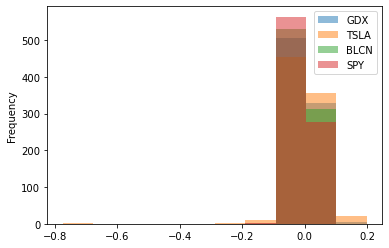

In [10]:
df_daily_returns.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

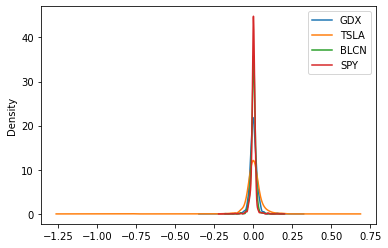

In [11]:
df_daily_returns.plot.density()

<AxesSubplot:>

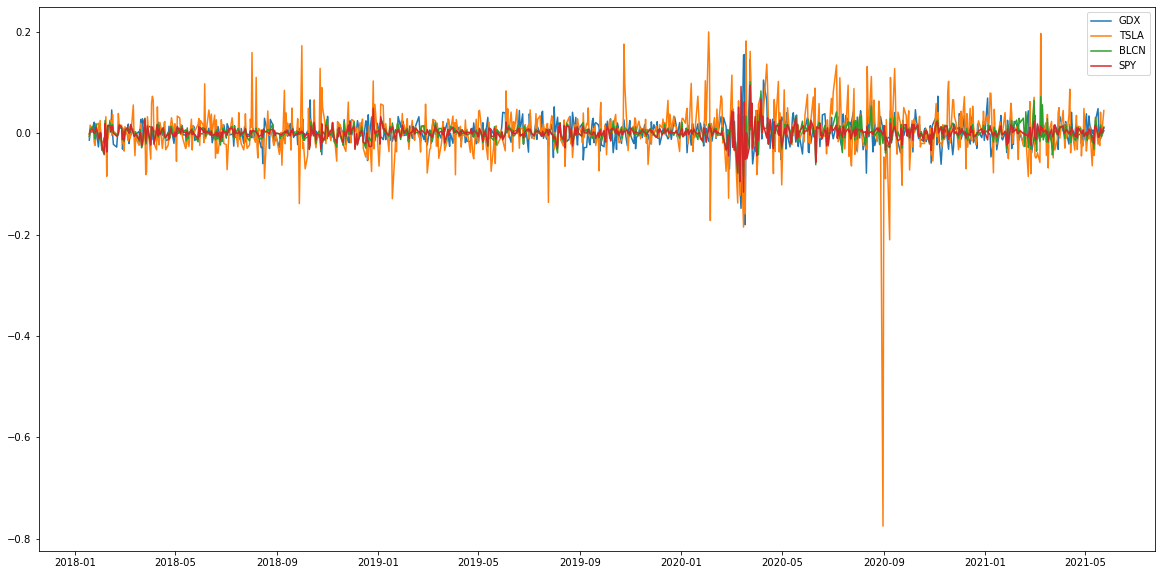

In [12]:
df_daily_returns.plot(figsize = (20,10))

<AxesSubplot:title={'center':'4 different assets'}>

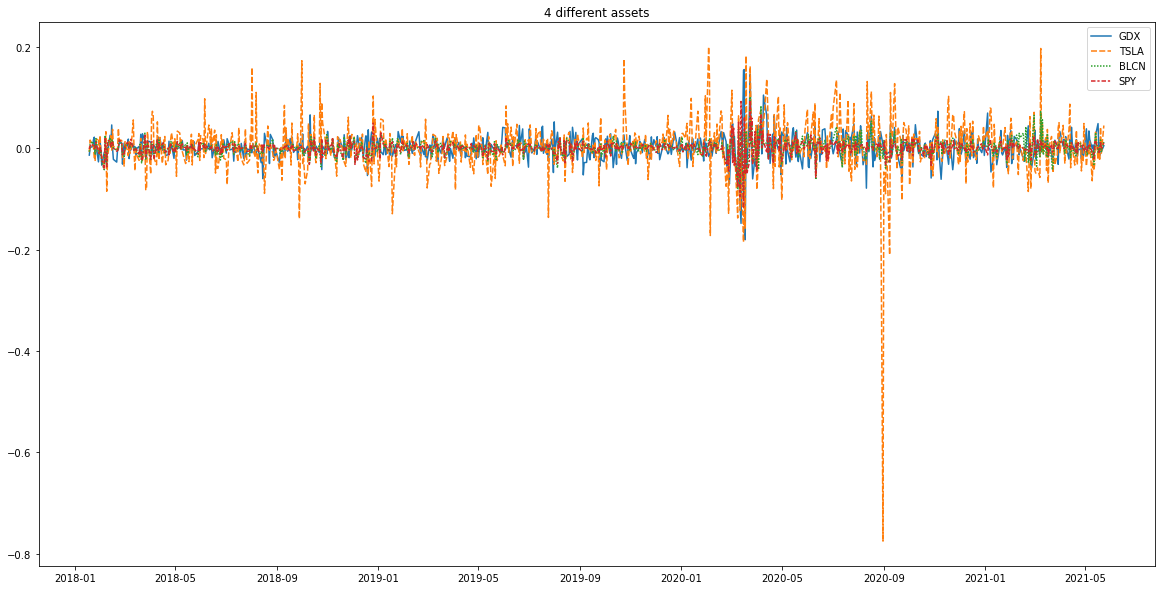

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("4 different assets")

# Line chart showing daily global streams of each song 
sns.lineplot(data=df_daily_returns)

Text(0, 0.5, 'Vertical Label')

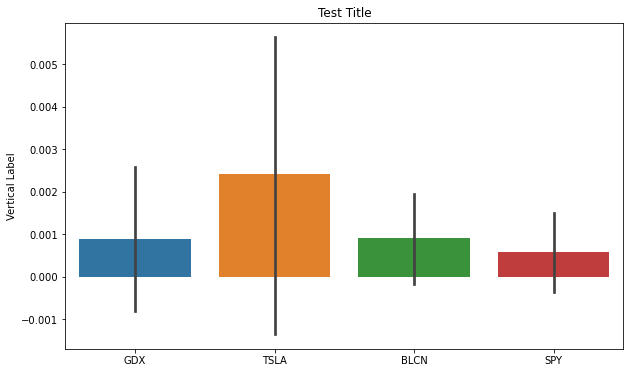

In [15]:
 #Set the width and height of the figure
plt.figure(figsize=(10,6))
 
# Add title
plt.title("Test Title")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(data= df_daily_returns)

# Add label for vertical axis
plt.ylabel("Vertical Label")

Text(0.5, 0, 'Date')

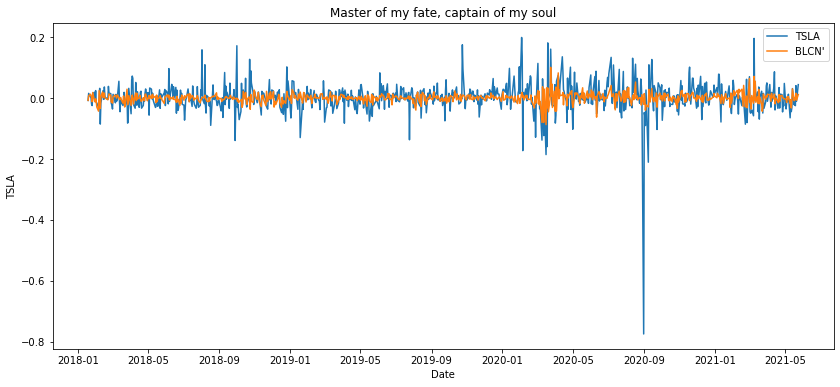

In [16]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Master of my fate, captain of my soul")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=df_daily_returns['TSLA'], label="TSLA")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=df_daily_returns['BLCN'], label="BLCN'")

# Add label for horizontal axis
plt.xlabel("Date")

<AxesSubplot:>

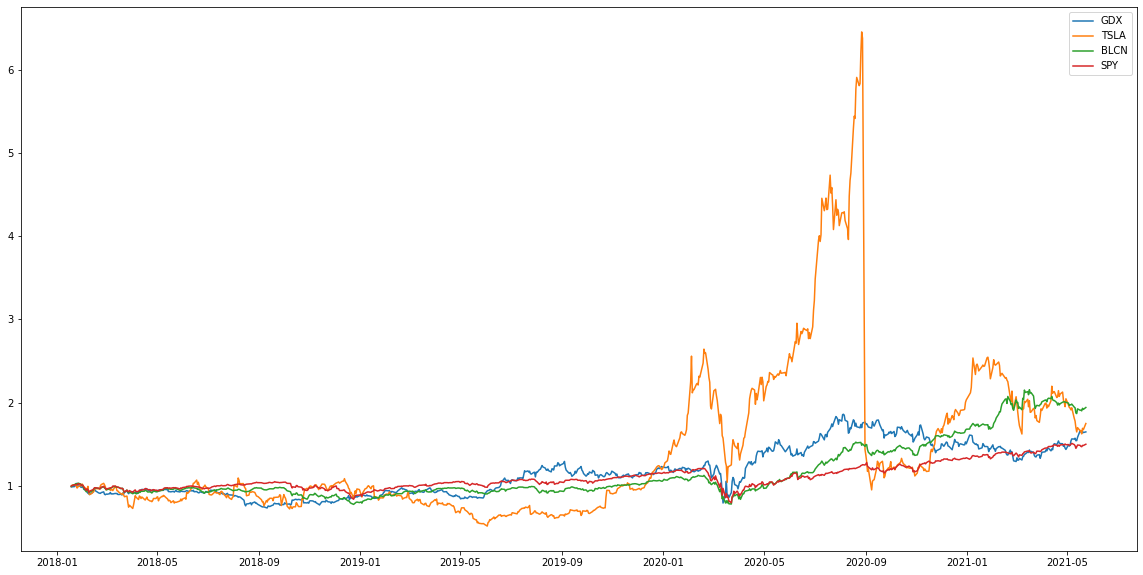

In [18]:
df_daily_returns = (1+ df_daily_returns).cumprod()
df_daily_returns.plot(figsize = (20,10))
